In [16]:
import glob
results_dir = '../data/intermediate/objective-3'
all_csv_files = glob.glob(results_dir + "/*.csv")
train_val_metrics = [
        "train_accuracy",
        "train_f1",
        "train_precision",
        "train_recall",
        "val_accuracy",
        "val_f1",
        "val_precision",
        "val_recall",
    ]

test_dummy_metrics = [
    "test_accuracy",
    "test_f1",
    "test_precision",
    "test_recall",
    "dummy_accuracy",
    "dummy_f1",
    "dummy_precision",
    "dummy_recall"
]
print(all_csv_files)

['../data/intermediate/objective-3/objective-3_all.csv', '../data/intermediate/objective-3/objective-3_flooding_slowloris.csv', '../data/intermediate/objective-3/objective-3_normal_flood.csv', '../data/intermediate/objective-3/objective-3_normal_slowloris.csv']


objective-3_all_learning_curve.png


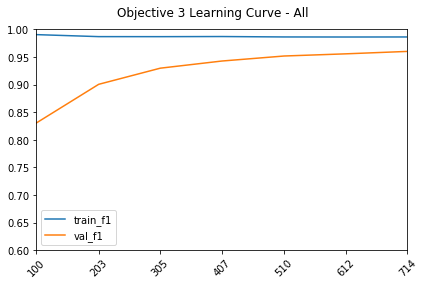

objective-3_flooding_slowloris_learning_curve.png


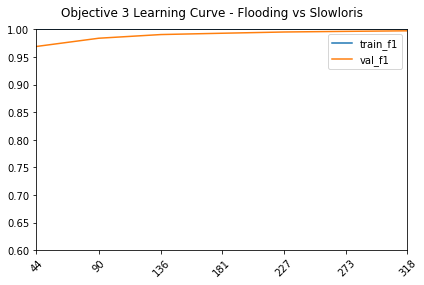

objective-3_normal_flood_learning_curve.png


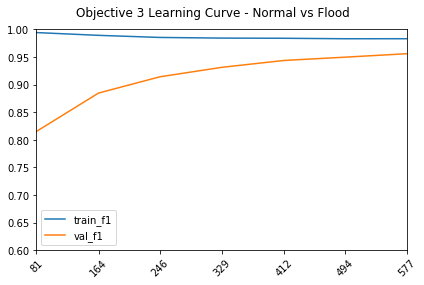

objective-3_normal_slowloris_learning_curve.png


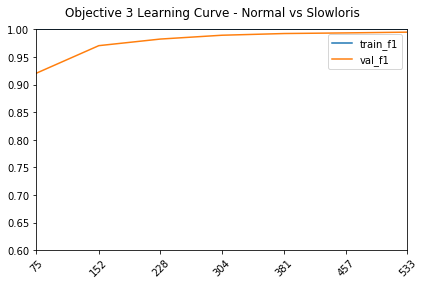

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
out_dir = '../figures/objective-3/learning_curves'
for file in all_csv_files:

    file_name = os.path.basename(file)
    file_name = os.path.splitext(file_name)[0]
    title, data_set_name = file_name.split('_', 1)
    prefix = title
    title = title.replace('-', ' ').title()
    data_set_tile = data_set_name.replace('_', ' ').title()
    data_set_tile = data_set_tile.replace(' ', ' vs ')
    os.makedirs(os.path.join(out_dir, data_set_name), exist_ok=True)



    os.makedirs(os.path.join(out_dir, data_set_name), exist_ok=True)
    fig_file_name = '{}_{}_{}.png'.format(prefix, data_set_name, 'learning_curve')

    print(fig_file_name)
    df = pd.read_csv(file, index_col=None, header=0)

    p = df.groupby('train_size').mean()

    # print(p
    ax = p.plot(kind='line', x=p.index.values, y=['train_f1', 'val_f1'])
    plt.xticks(p.index, p.index.values, rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(0.6,1)
    plt.suptitle('{} Learning Curve - {}'.format(title, data_set_tile))

    fig = ax.get_figure()
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    fig.savefig(os.path.join(out_dir, data_set_name, fig_file_name))
    plt.close()
